In [5]:
import openpyxl as os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
data = pd.read_csv(r"D:\\7th Semester\\CSE 303\Bike Sales Dashboard.csv")
print(data)

        ID Martial Status  Gender    Income  Children        Education  \
0    12496        Married  Female   $40,000         1        Bachelors   
1    24107        Married    Male   $30,000         3  Partial College   
2    14177        Married    Male   $80,000         5  Partial College   
3    24381         Single    Male   $70,000         0        Bachelors   
4    25597         Single    Male   $30,000         0        Bachelors   
..     ...            ...     ...       ...       ...              ...   
995  23731        Married    Male   $60,000         2      High School   
996  28672         Single    Male   $70,000         4  Graduate Degree   
997  11809        Married    Male   $60,000         2        Bachelors   
998  19664         Single    Male  $100,000         3        Bachelors   
999  12121         Single    Male   $60,000         3      High School   

         Occupation Home Owner  Cars    Commute Distance         Region  Age  \
0    Skilled Manual        Yes 

In [9]:
numerical_columns = data.select_dtypes(include=[np.number])
descriptive_stats = numerical_columns.describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)



Descriptive Statistics:
                 ID     Children         Cars          Age
count   1000.000000  1000.000000  1000.000000  1000.000000
mean   19965.992000     1.898000     1.442000    44.163000
std     5347.333948     1.628572     1.125123    11.364488
min    11000.000000     0.000000     0.000000    25.000000
25%    15290.750000     0.000000     1.000000    35.000000
50%    19744.000000     2.000000     1.000000    43.000000
75%    24470.750000     3.000000     2.000000    52.000000
max    29447.000000     5.000000     4.000000    89.000000


In [13]:
target_counts = data['Purchased Bike'].value_counts()
balance_percentage = (target_counts / len(data)) * 100
print("\nBalance Percentage:")
print(balance_percentage)


Balance Percentage:
Purchased Bike
No     51.9
Yes    48.1
Name: count, dtype: float64


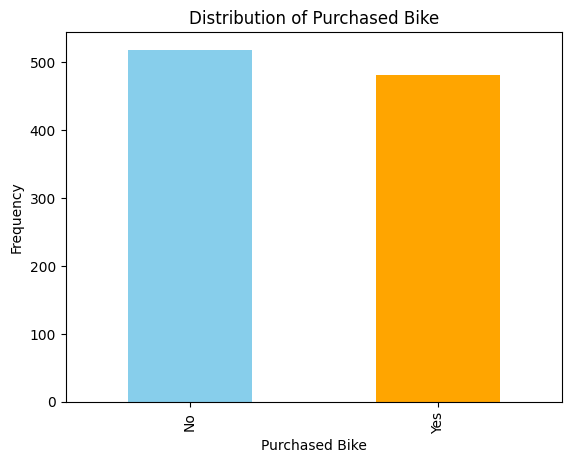

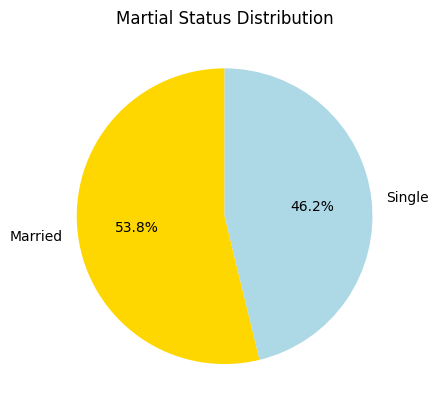

In [14]:
target_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Purchased Bike')
plt.xlabel('Purchased Bike')
plt.ylabel('Frequency')
plt.show()

# Pie chart for "Martial Status"
data['Martial Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue'])
plt.title('Martial Status Distribution')
plt.ylabel('')
plt.show()

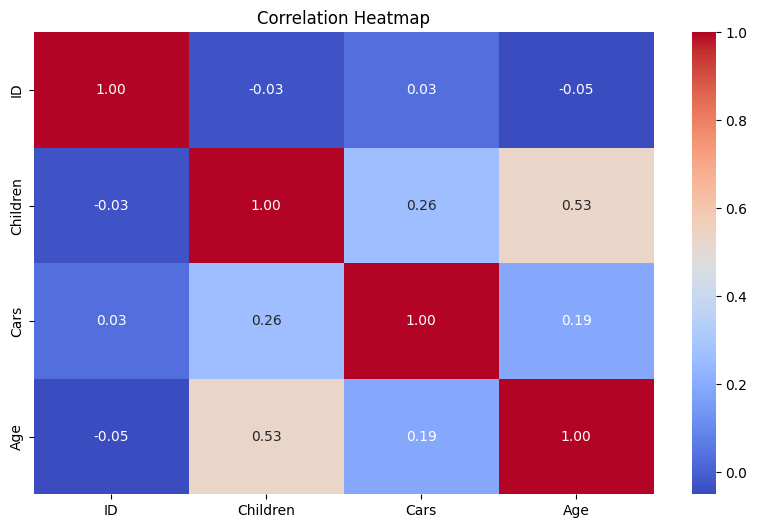

In [21]:
# 5. Correlation heatmap
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
# 6. Convert categorical data to numerical
categorical_columns = data.select_dtypes(include=['object'])
encoded_data = pd.get_dummies(data, drop_first=True)
print("\nEncoded Data Sample:")
print(encoded_data.head())


Encoded Data Sample:
      ID  Children  Cars  Age  Martial Status_Single  Gender_Male  \
0  12496         1     0   42                  False        False   
1  24107         3     1   43                  False         True   
2  14177         5     2   60                  False         True   
3  24381         0     1   41                   True         True   
4  25597         0     0   36                   True         True   

   Income_$100,000  Income_$110,000  Income_$120,000  Income_$130,000  ...  \
0            False            False            False            False  ...   
1            False            False            False            False  ...   
2            False            False            False            False  ...   
3            False            False            False            False  ...   
4            False            False            False            False  ...   

   Home Owner_Yes  Commute Distance_1-2 Miles  Commute Distance_2-5 Miles  \
0            True

In [24]:
# 7. Handle missing values (if any)
# Assuming numerical columns: Fill missing values with mean
# Assuming categorical columns: Fill missing values with mode
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)

print("\nMissing Values After Handling:")
print(data.isnull().sum())


Missing Values After Handling:
ID                  0
Martial Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Age Brackets        0
Purchased Bike      0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_15120\3596517613.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15120\3596517613.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 